# ML - HW4 - Q3
# Ali Khoramfar - 810102129

# Import Packages

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Input
import numpy as np
import matplotlib.pyplot as plt

2024-06-20 09:02:07.219388: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-20 09:02:07.219546: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-20 09:02:07.378461: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Dataset

##  Load MNIST dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Preprocess the data

In [3]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# MLP model


In [26]:
train_images_mlp = train_images.reshape((60000, 28 * 28))
test_images_mlp = test_images.reshape((10000, 28 * 28))

In [4]:
mlp_model = Sequential([
    Dense(512, activation='relu', input_shape=(28 * 28,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
mlp_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train Model

In [29]:
mlp_model.fit(train_images_mlp, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8552 - loss: 0.4886 - val_accuracy: 0.9582 - val_loss: 0.1354
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9700 - loss: 0.0980 - val_accuracy: 0.9733 - val_loss: 0.0905
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9820 - loss: 0.0592 - val_accuracy: 0.9729 - val_loss: 0.0919
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9866 - loss: 0.0411 - val_accuracy: 0.9701 - val_loss: 0.0994
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9899 - loss: 0.0311 - val_accuracy: 0.9710 - val_loss: 0.1105
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9913 - loss: 0.0260 - val_accuracy: 0.9744 - val_loss: 0.0942
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9933 - loss: 0.0194 - val_accuracy: 0.9744 - val_loss: 0.0938
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9950 - loss: 0.0151 - val_accur

## Evaluate MLP Model

In [30]:
test_loss, test_acc = mlp_model.evaluate(test_images_mlp, test_labels)
print(f'MLP Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9759 - loss: 0.1032
MLP Test accuracy: 0.9779000282287598


#  LeNet model

In [31]:
train_images_lenet = train_images.reshape((60000, 28, 28, 1))
test_images_lenet = test_images.reshape((10000, 28, 28, 1))

In [6]:
lenet_model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(6, kernel_size=(5, 5), activation='sigmoid', padding='same'),
    AveragePooling2D(pool_size=(2, 2), strides=2),
    Conv2D(16, kernel_size=(5, 5), activation='sigmoid'),
    AveragePooling2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(120, activation='sigmoid'),
    Dense(84, activation='sigmoid'),
    Dense(10, activation='softmax')
])

In [7]:
lenet_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
lenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the model

In [34]:
lenet_model.fit(train_images_lenet, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.1886 - loss: 2.1836 - val_accuracy: 0.8562 - val_loss: 0.5714
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.8768 - loss: 0.4719 - val_accuracy: 0.9207 - val_loss: 0.2693
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9245 - loss: 0.2597 - val_accuracy: 0.9411 - val_loss: 0.1988
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9395 - loss: 0.2040 - val_accuracy: 0.9461 - val_loss: 0.1766
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.9498 - loss: 0.1657 - val_accuracy: 0.9578 - val_loss: 0.1375
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.9581 - loss: 0.1408 - val_accuracy: 0.9636 - val_loss: 0.1214
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.9628 - loss: 0.1234 - val_accuracy: 0.9672 - val_loss: 0.1087
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.9676 - loss: 0.1101 - 

## Evaluate LeNet Model

In [35]:
test_loss, test_acc = lenet_model.evaluate(test_images_lenet, test_labels)
print(f'LeNet Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9736 - loss: 0.0825
LeNet Test accuracy: 0.9768999814987183


# Compare Models

## Select an image

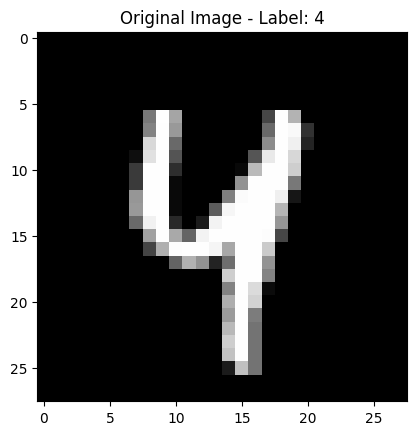

In [121]:
image_index = 42 
original_image = test_images[image_index]
original_label = np.argmax(test_labels[image_index])

plt.imshow(original_image, cmap='gray')
plt.title(f'Original Image - Label: {original_label}')
plt.show()

## Shift the Image

In [122]:
def shift_image(image, dx, dy):
    image = tf.convert_to_tensor(image, dtype=tf.float32)
    image = tf.expand_dims(image, axis=-1)  
    translated_image = tf.keras.preprocessing.image.apply_affine_transform(image, tx=dx, ty=dy)
    return translated_image.reshape(28, 28)

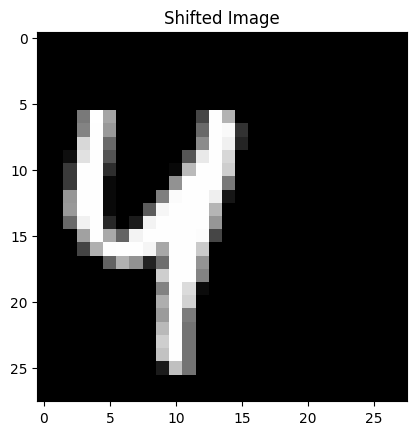

In [134]:
shifted_image = shift_image(original_image, dx=1, dy=5)
plt.imshow(shifted_image, cmap='gray')
plt.title('Shifted Image')
plt.show()

## Preprocess for both Models

In [135]:
shifted_image_mlp = shifted_image.reshape(1, 28 * 28)
shifted_image_lenet = shifted_image.reshape(1, 28, 28, 1)

In [136]:
mlp_prediction = mlp_model.predict(shifted_image_mlp)
mlp_predicted_label = np.argmax(mlp_prediction)
print(f'MLP Predicted Label: {mlp_predicted_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MLP Predicted Label: 6


In [137]:
lenet_prediction = lenet_model.predict(shifted_image_lenet)
lenet_predicted_label = np.argmax(lenet_prediction)
print(f'LeNet Predicted Label: {lenet_predicted_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
LeNet Predicted Label: 4
